In [1]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file(
'/home/yjalil/code/prelectureMLops/da1774-3dbcfa934d42.json')

project_id = 'da1774'
client = bigquery.Client(credentials= credentials,project=project_id)

In [4]:

source = "jan2024_yellow"
query_job = client.query(f'''SELECT * FROM `da1774.taxifare.{source}` LIMIT 100 ''')
results = query_job.result()
df = results.to_dataframe()
df.head()


/home/yjalil/.pyenv/versions/prelecture/lib/python3.11/site-packages/google/cloud/bigquery/table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-01-01 00:54:08+00:00,2024-01-01 01:26:31+00:00,1,4.70,1,N,148,141,1,29.6,3.5,0.5,6.90,0.00,1.0,41.50,2.5,0.0
1,1,2024-01-01 00:35:16+00:00,2024-01-01 01:11:52+00:00,2,8.20,1,N,246,190,1,59.0,3.5,0.5,14.15,6.94,1.0,85.09,2.5,0.0
2,1,2024-01-01 00:36:30+00:00,2024-01-01 01:13:53+00:00,2,1.70,1,N,246,170,1,29.6,3.5,0.5,6.90,0.00,1.0,41.50,2.5,0.0
3,2,2024-01-01 00:49:31+00:00,2024-01-01 01:35:41+00:00,2,8.89,1,N,79,41,1,47.8,1.0,0.5,7.92,0.00,1.0,60.72,2.5,0.0
4,2,2024-01-01 00:15:26+00:00,2024-01-01 00:33:57+00:00,1,11.51,1,N,262,171,1,44.3,1.0,0.5,11.25,6.94,1.0,67.49,2.5,0.0


In [4]:
from models.regression_taxifare import hello

ModuleNotFoundError: No module named 'models'

In [1]:
from ..models.regression_taxifare import hello

ImportError: attempted relative import with no known parent package

In [2]:
!pwd

/home/yjalil/code/prelectureMLops/project/notebooks


In [1]:
from project.models.regression_taxifare import hello, get_secret

In [2]:
hello()

'Hello, World!'

In [2]:
get_secret()

In [11]:
import os
print(os.getcwd())

/root/code/Drissisanaa/06-Deep-Learning/prelectureMLops/project/notebooks


In [49]:
import os
import pandas as pd

# Spécifiez le chemin d'accès au fichier CSV
data_dir = '../../data/query_2009-01-01_2015-01-01_200k.csv'  # Chemin relatif

# Ou utilisez un chemin absolu
# data_dir = '/root/code/Drissisanaa/06-Deep-Learning/prelectureMLops/data/query_2009-01-01_2015-01-01_200k.csv'

# Vérifiez si le fichier existe
if os.path.exists(data_dir):
    # Lire le fichier CSV
    df = pd.read_csv(data_dir)
    print("Fichier chargé avec succès.")
    print(df.head())  # Affiche les premières lignes du DataFrame
else:
    print(f"Erreur : Le fichier {data_dir} n'a pas été trouvé.")

Fichier chargé avec succès.
   fare_amount            pickup_datetime  pickup_longitude  pickup_latitude  \
0          4.2  2009-01-01 01:14:44+00:00        -73.982410        40.782397   
1         11.8  2009-01-01 03:51:05+00:00        -74.006797        40.716359   
2         26.6  2009-01-01 04:23:00+00:00        -73.982930        40.742167   
3         19.8  2009-01-01 04:49:52+00:00        -73.983822        40.729471   
4          3.4  2009-01-01 05:04:41+00:00        -74.013008        40.706021   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.978177         40.783295                1  
1         -73.978616         40.752433                2  
2         -73.896904         40.843012                1  
3         -73.982300         40.776622                2  
4         -74.012851         40.702645                1  


In [3]:
df.shape

(90743, 7)

In [4]:
df.dtypes


fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [50]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [6]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [51]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1
...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1


In [52]:
# Convert pickup_datetime to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create a new column 'is_night' based on the specified conditions
def categorize_time(row):
    hour = row['pickup_datetime'].hour
    # Check if the hour is between 20 (8 PM) and 7 (7 AM)
    if hour >= 20 or hour < 7:
        return 1  # Night
    else:
        return 0  # Not Night

df['is_night'] = df.apply(categorize_time, axis=1)

# Display the updated DataFrame
print(df)

       fare_amount           pickup_datetime  pickup_longitude  \
0             4.20 2009-01-01 01:14:44+00:00        -73.982410   
1            11.80 2009-01-01 03:51:05+00:00        -74.006797   
2            26.60 2009-01-01 04:23:00+00:00        -73.982930   
3            19.80 2009-01-01 04:49:52+00:00        -73.983822   
4             3.40 2009-01-01 05:04:41+00:00        -74.013008   
...            ...                       ...               ...   
90738        14.50 2014-12-31 22:08:00+00:00        -73.980395   
90739         9.50 2014-12-31 22:19:11+00:00        -73.962421   
90740        74.16 2014-12-31 22:26:27+00:00        -73.783610   
90741         8.50 2014-12-31 22:29:09+00:00        -73.995097   
90742        16.50 2014-12-31 23:49:25+00:00        -73.994672   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.782397         -73.978177         40.783295                1   
1            40.716359         -73.978616      

In [53]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_night
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,1
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,1
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,1
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,1
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,1
...,...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1,1
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2,1
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2,1
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1,1


In [54]:
import numpy as np
def haversine(lon1, lat1, lon2, lat2):
    R = 6371  # Radius of the Earth in kilometers
    dlon = np.radians(lon2 - lon1)
    dlat = np.radians(lat2 - lat1)

    a = (np.sin(dlat / 2) ** 2 +
         np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) *
         np.sin(dlon / 2) ** 2)

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return R * c  # Distance in kilometers

# Calculate distance and create a new column in the DataFrame
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'],
                                                    row['dropoff_longitude'], row['dropoff_latitude']), axis=1)

# Display the updated DataFrame
print(df)

       fare_amount           pickup_datetime  pickup_longitude  \
0             4.20 2009-01-01 01:14:44+00:00        -73.982410   
1            11.80 2009-01-01 03:51:05+00:00        -74.006797   
2            26.60 2009-01-01 04:23:00+00:00        -73.982930   
3            19.80 2009-01-01 04:49:52+00:00        -73.983822   
4             3.40 2009-01-01 05:04:41+00:00        -74.013008   
...            ...                       ...               ...   
90738        14.50 2014-12-31 22:08:00+00:00        -73.980395   
90739         9.50 2014-12-31 22:19:11+00:00        -73.962421   
90740        74.16 2014-12-31 22:26:27+00:00        -73.783610   
90741         8.50 2014-12-31 22:29:09+00:00        -73.995097   
90742        16.50 2014-12-31 23:49:25+00:00        -73.994672   

       pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  \
0            40.782397         -73.978177         40.783295                1   
1            40.716359         -73.978616      

In [14]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,is_night,distance_km
0,4.20,2009-01-01 01:14:44+00:00,-73.982410,40.782397,-73.978177,40.783295,1,1,0.370124
1,11.80,2009-01-01 03:51:05+00:00,-74.006797,40.716359,-73.978616,40.752433,2,1,4.661342
2,26.60,2009-01-01 04:23:00+00:00,-73.982930,40.742167,-73.896904,40.843012,1,1,13.348688
3,19.80,2009-01-01 04:49:52+00:00,-73.983822,40.729471,-73.982300,40.776622,2,1,5.244519
4,3.40,2009-01-01 05:04:41+00:00,-74.013008,40.706021,-74.012851,40.702645,1,1,0.375627
...,...,...,...,...,...,...,...,...,...
90738,14.50,2014-12-31 22:08:00+00:00,-73.980395,40.742585,-73.994602,40.769627,1,1,3.236297
90739,9.50,2014-12-31 22:19:11+00:00,-73.962421,40.794752,-73.940646,40.814270,2,1,2.840641
90740,74.16,2014-12-31 22:26:27+00:00,-73.783610,40.648637,-74.091878,40.626073,2,1,26.132341
90741,8.50,2014-12-31 22:29:09+00:00,-73.995097,40.752067,-73.981982,40.766362,1,1,1.935664


In [55]:
# Keep only the specified columns
result_df = df[['fare_amount', 'passenger_count', 'is_night', 'distance_km']]
result_df

,fare_amount,passenger_count,is_night,distance_km
0,4.20,1,1,0.370124
1,11.80,2,1,4.661342
2,26.60,1,1,13.348688
3,19.80,2,1,5.244519
4,3.40,1,1,0.375627
...,...,...,...,...
90738,14.50,1,1,3.236297
90739,9.50,2,1,2.840641
90740,74.16,2,1,26.132341
90741,8.50,1,1,1.935664


In [56]:
import pandas as pd
from scipy import stats

# Assuming df is your DataFrame outliers greater than 3 or less than -3 as outliers.
z_scores = np.abs(stats.zscore(result_df[['fare_amount', 'distance_km', 'passenger_count','is_night']]))
df_cleaned = result_df[(z_scores < 3).all(axis=1)]

In [58]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['fare_amount', 'distance_km', 'passenger_count','is_night']].quantile(0.25)
Q3 = df[['fare_amount', 'distance_km', 'passenger_count','is_night']].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the DataFrame
df_cleaned = df_cleaned[~((df_cleaned[['fare_amount', 'distance_km', 'passenger_count','is_night']] < lower_bound) |
                   (df_cleaned[['fare_amount', 'distance_km', 'passenger_count','is_night']] > upper_bound)).any(axis=1)]

In [34]:
df_cleaned

,fare_amount,passenger_count,is_night,distance_km
0,4.2,1,1,0.370124
1,11.8,2,1,4.661342
3,19.8,2,1,5.244519
4,3.4,1,1,0.375627
6,12.1,1,0,4.093867
...,...,...,...,...
90737,8.5,1,1,2.088888
90738,14.5,1,1,3.236297
90739,9.5,2,1,2.840641
90741,8.5,1,1,1.935664


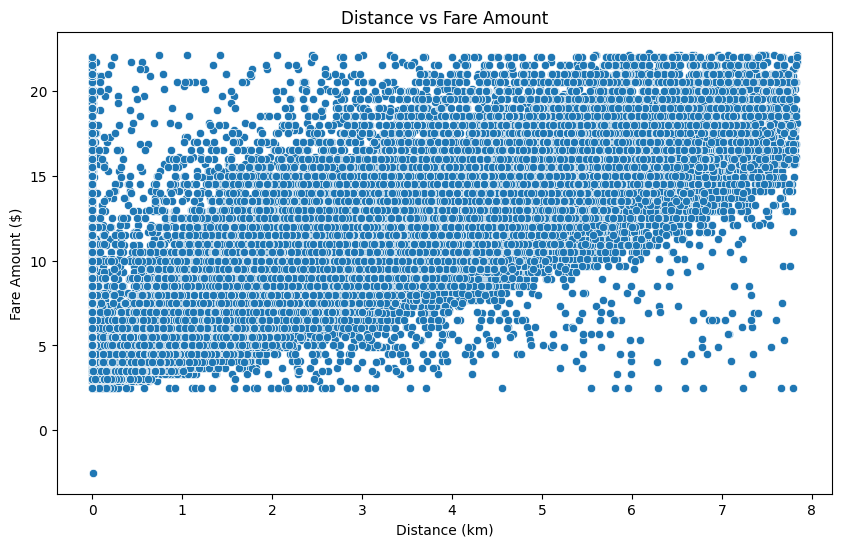

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot for distance_km vs fare_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='distance_km', y='fare_amount')
plt.title('Distance vs Fare Amount')
plt.xlabel('Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()

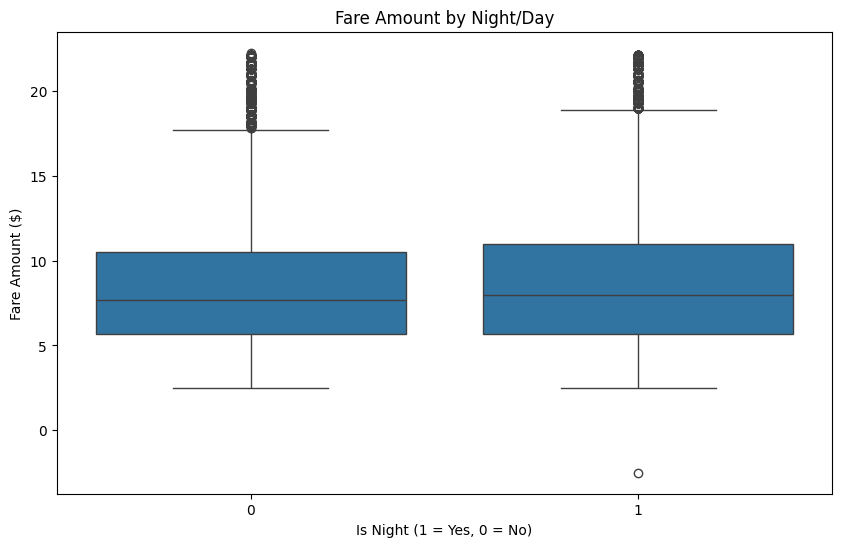

In [36]:
# Box plot for fare_amount based on is_night
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='is_night', y='fare_amount')
plt.title('Fare Amount by Night/Day')
plt.xlabel('Is Night (1 = Yes, 0 = No)')
plt.ylabel('Fare Amount ($)')
plt.show()

fare_amount        1.000000
distance_km        0.780149
is_night           0.031445
passenger_count    0.022351
Name: fare_amount, dtype: float64


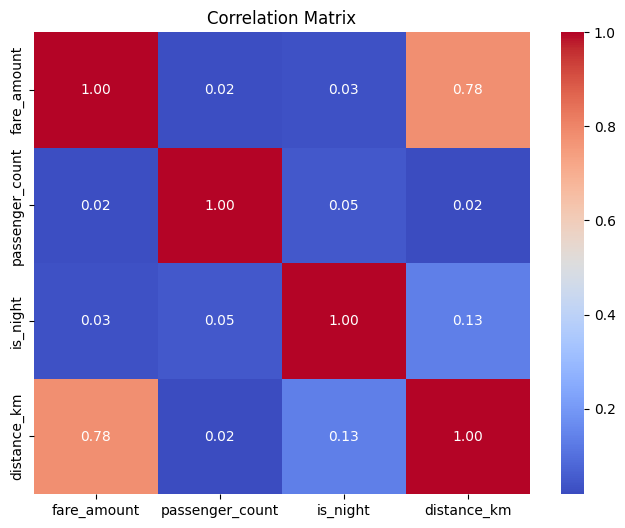

In [60]:
# Calculate correlation matrix
#Calculate the correlation between numerical features and the target variable.
correlation_matrix = df_cleaned.corr()

# Display correlation with fare_amount
print(correlation_matrix['fare_amount'].sort_values(ascending=False))

# Heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [39]:
# Assuming you have already created the DataFrame with the required columns
X = df_cleaned[['distance_km', 'passenger_count', 'is_night']]
y = df_cleaned['fare_amount']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


# Example input data
new_data = [[5.2, 2, 1]]  # distance_km, passenger_count, is_night

prediction = model.predict([new_data[0]])
print(f"Predicted fare amount: ${prediction[0]:.2f}")

Mean Squared Error: 5.90
R-squared: 0.61
Predicted fare amount: $13.77


/root/.pyenv/versions/3.11.9/envs/taxifare2/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [61]:
df_cleaned

,fare_amount,passenger_count,is_night,distance_km
0,4.2,1,1,0.370124
1,11.8,2,1,4.661342
3,19.8,2,1,5.244519
4,3.4,1,1,0.375627
6,12.1,1,0,4.093867
...,...,...,...,...
90737,8.5,1,1,2.088888
90738,14.5,1,1,3.236297
90739,9.5,2,1,2.840641
90741,8.5,1,1,1.935664


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated scores: {scores}")

Cross-validated scores: [0.61030591 0.53657153 0.6210948  0.60576147 0.54366405]


In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Union
from sklearn.compose import ColumnTransformer
from sklearn import simpleimputer
from sklearn.pipeline import make_pipeline
from sklearn import onehotencoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_union
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
num_transformer = make_pipeline(SimpleImputer(), StandardScaler())
cat_transformer = OneHotEncoder()
preproc_basic = make_column_transformer(
    (num_transformer, ['distance_km']),
    (cat_transformer, ['passenger_count', 'is_night']),
    remainder='passthrough'
)
preproc_full = (preproc_basic, )
preproc_full

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous ayez déjà chargé et préparé vos données
# et que X_scaled contienne les caractéristiques standardisées

# Split des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)

# Évaluation du modèle sur l'ensemble de test
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 5.90
R-squared: 0.61


In [48]:
X_scaled

array([[-1.20734732, -0.47741491,  1.33168632],
       [ 1.41177735,  1.33669664,  1.33168632],
       [ 1.76771693,  1.33669664,  1.33168632],
       ...,
       [ 0.30052077,  1.33669664,  1.33168632],
       [-0.25182734, -0.47741491,  1.33168632],
       [-0.16921936, -0.47741491,  1.33168632]])

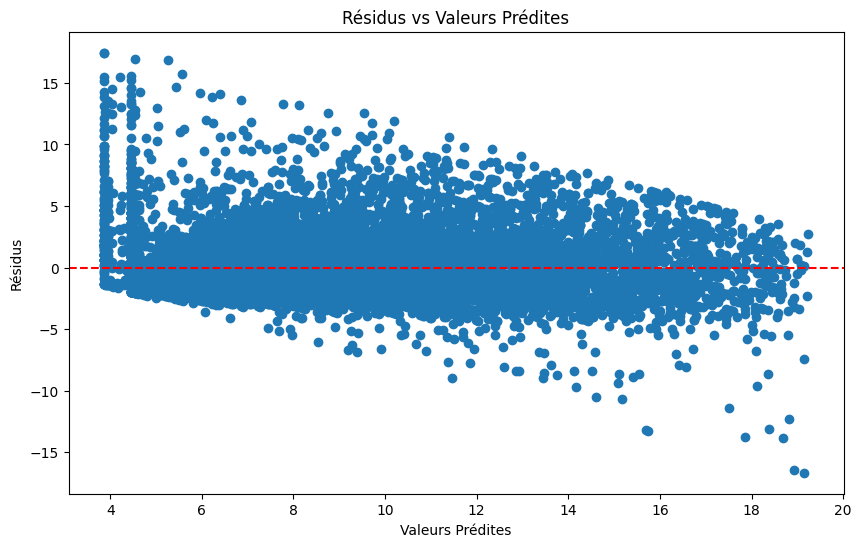

In [46]:
import matplotlib.pyplot as plt

# Résidus
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Valeurs Prédites')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()